# Sampling Concrete Frame Bridges - SBB Project


In [1]:
from skopt.sampler import Lhs, Sobol
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os
import time
import math as m

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math as m

In [2]:
from sampler import *

## Initialize

In [3]:
# INPUT HERE
idx_s=804 # Smapling Index (= Sampling Batch number)
n_samples=1000 #number of samples that should be generated


In [4]:
current_directory = os.getcwd()
folder_name='CFBData'
folder_path = os.path.join(current_directory, folder_name)

create_subfolders_for_samples(idx_s, n_samples, folder_path=folder_path)

## IF:Creating one specific Bridge Sample

If you want to define and create one specific bridge sample without variing any parameters.



In [33]:
# define a specific sample to be caluclated
bridge_parameters = {
    #-----Main Geometric Parameters------
    # Span [mm]
    'L': [5800],
    # Width [mm]
    'b1': [9720],
    # Deck slab (plate) thickness [mm]
    't_p': [400],
    # walls thickness [mm]
    't_w': [400],
    # wall height [mm]
    'h_w': [2580],
    # Plate Angle [Degree]
    'alpha_l':[90],
    # Hight of Voute  [mm]
    'h_v': [0] ,
     # Length of Voute  [mm]
    'l_v': [0],    


    #-----Reinforcement Geom. Parameters-----
    # upper reinforcement cover [mm],
    'oo' : [30],
    # lower reinforcement cover [mm]
    'uu': [30],
    # Reinforcement Diameter of all plate sections - Layer 4 (upper outer layer) [mm]
    'd4_plate': [24],
    # Reinforcement Diameter of all plate sections - Layer 3 (upper middle layer) [mm]
    'd3_plate': [12],
    # Reinforcement Diameter of all plate sections - Layer 2 (lower middle layer) [mm]
    'd2_plate':[12],
    # Reinforcement Diameter of all plate sections - Layer 1 (lower outer layer) [mm]
    'd1_plate': [24],
    # Reinforcement spacing of all plate sections [mm]
    's_plate': [200],
    # Reinforcement Diameter of all walls sections - Layer 4 (outer layer) [mm]
    'd4_walls': [24],
    # Reinforcement Diameter of all walls sections - Layer 3 (outer middle layer) [mm]
    'd3_walls': [12],
    # Reinforcement Diameter of all walls sections - Layer 2 (inner middle layer) [mm]
    'd2_walls':[12],
    # Reinforcement Diameter of all plate sections - Layer 1 (inner layer) [mm]
    'd1_walls': [14],
    # Reinforcement spacing of all walls sections [mm]
    's_walls': [200],

    #-----Material Parameters -------
    # Concrete compressive strength
    'fcc': [12.8],
    # Reinforcement steel yield strength
    'fsy': [390],
    # Reinforcement steel ultimate strength factor
    'fsu_fac': [1.08],
    # ultimate reinforcement strain [-]
    'esu': [0.045],

    #----- Load Parameter -------
    # Distance between origin and track middle axis
    's': [0.18179012],
    # Angle between global x axis and track axis
    'beta': [5],
    #Gravel layer hight [mm]
    'h_G': [1000],
    #spez. weight of backfill [N/mm3]
    'gamma_E':[0.00002],
    # friction angle [Degree]
    'phi_k': [30],
    # Load of concrete sleeper (Betonschwelle) and rail track [N/mm]
    'q_Gl': [4.8+1.7],
    # width of concrete sleeper (Betonschwelle) [mm]
    'b_Bs':[2500] ,
    # norminal axle load (dependent on the class, acc. to SIA 269/1 11.2, for D4 = 225 [N] )
    'Q_k':[225000],


    # -----section geom. parameter -----
    # Proportion of outter plate sections [-]
    'l_sec': [0.33 ],
    # Proportion of section 1 (wall 1 side) [-]
    'b_sec1_b1': [0.33],
    # Proportion of section 2 (wall 1 side) [-]
    'b_sec2_b1': [0.33],
    # Proportion of wall section (upper)
    'h_S1_3': [0.33],
    # Proportion of wall section (lower)
    'h_S7_9': [0.33],
    # mesh_size_factor (multiplied with t_p or t_w respectively)
    'mesh_size_factor': [3] 

    }


In [12]:

df_x = pd.DataFrame(bridge_parameters)
df_x

,L,b1,t_p,t_w,h_w,alpha_l,h_v,l_v,oo,uu,...,phi_k,q_Gl,b_Bs,Q_k,l_sec,b_sec1_b1,b_sec2_b1,h_S1_3,h_S7_9,mesh_size_factor
0,5800,9720,400,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3


## IF: 1D Paramater Studie

In [5]:
# Generate ordered samples
v=np.linspace(200., 1200., n_samples)
df_x=pd.DataFrame(v, columns=['t_p'])
df_x

,t_p
0,200.000000
1,220.408163
2,240.816327
3,261.224490
4,281.632653
5,302.040816
6,322.448980
7,342.857143
8,363.265306
9,383.673469


In [6]:
# define a specific sample to be caluclated 
# but comment out the parameter you sampled in this 1D parameter study
bridge_parameters = {
    #-----Main Geometric Parameters------
    # Span [mm]
    'L': [5800],
    # Width [mm]
    'b1': [9720],
    # Deck slab (plate) thickness [mm]
    #'t_p': [400],
    # walls thickness [mm]
    't_w': [400],
    # wall height [mm]
    'h_w': [2580],
    # Plate Angle [Degree]
    'alpha_l':[90],
    # Hight of Voute  [mm]
    'h_v': [0] ,
     # Length of Voute  [mm]
    'l_v': [0],    


    #-----Reinforcement Geom. Parameters-----
    # upper reinforcement cover [mm],
    'oo' : [30],
    # lower reinforcement cover [mm]
    'uu': [30],
    # Reinforcement Diameter of all plate sections - Layer 4 (upper outer layer) [mm]
    'd4_plate': [24],
    # Reinforcement Diameter of all plate sections - Layer 3 (upper middle layer) [mm]
    'd3_plate': [12],
    # Reinforcement Diameter of all plate sections - Layer 2 (lower middle layer) [mm]
    'd2_plate':[12],
    # Reinforcement Diameter of all plate sections - Layer 1 (lower outer layer) [mm]
    'd1_plate': [24],
    # Reinforcement spacing of all plate sections [mm]
    's_plate': [200],
    # Reinforcement Diameter of all walls sections - Layer 4 (outer layer) [mm]
    'd4_walls': [24],
    # Reinforcement Diameter of all walls sections - Layer 3 (outer middle layer) [mm]
    'd3_walls': [12],
    # Reinforcement Diameter of all walls sections - Layer 2 (inner middle layer) [mm]
    'd2_walls':[12],
    # Reinforcement Diameter of all plate sections - Layer 1 (inner layer) [mm]
    'd1_walls': [14],
    # Reinforcement spacing of all walls sections [mm]
    's_walls': [200],

    #-----Material Parameters -------
    # Concrete compressive strength
    'fcc': [12.8],
    # Reinforcement steel yield strength
    'fsy': [390],
    # Reinforcement steel ultimate strength factor
    'fsu_fac': [1.08],
    # ultimate reinforcement strain [-]
    'esu': [0.045],

    #----- Load Parameter -------
    # Distance between origin and track middle axis
    's': [0.18179012],
    # Angle between global x axis and track axis
    'beta': [5],
    #Gravel layer hight [mm]
    'h_G': [1000],
    #spez. weight of backfill [N/mm3]
    'gamma_E':[0.00002],
    # friction angle [Degree]
    'phi_k': [30],
    # Load of concrete sleeper (Betonschwelle) and rail track [N/mm]
    'q_Gl': [4.8+1.7],
    # width of concrete sleeper (Betonschwelle) [mm]
    'b_Bs':[2500] ,
    # norminal axle load (dependent on the class, acc. to SIA 269/1 11.2, for D4 = 225 [N] )
    'Q_k':[225000],


    # -----section geom. parameter -----
    # Proportion of outter plate sections [-]
    'l_sec': [0.33 ],
    # Proportion of section 1 (wall 1 side) [-]
    'b_sec1_b1': [0.33],
    # Proportion of section 2 (wall 1 side) [-]
    'b_sec2_b1': [0.33],
    # Proportion of wall section (upper)
    'h_S1_3': [0.33],
    # Proportion of wall section (lower)
    'h_S7_9': [0.33],
    # mesh_size_factor (multiplied with t_p or t_w respectively)
    'mesh_size_factor': [3] 
    }


In [7]:
# combine sampled variable vector with constants
for key in bridge_parameters.keys():
    df_x[key]=bridge_parameters[key][0]
df_x

,t_p,L,b1,t_w,h_w,alpha_l,h_v,l_v,oo,uu,...,phi_k,q_Gl,b_Bs,Q_k,l_sec,b_sec1_b1,b_sec2_b1,h_S1_3,h_S7_9,mesh_size_factor
0,200.000000,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
1,220.408163,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
2,240.816327,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
3,261.224490,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
4,281.632653,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
5,302.040816,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
6,322.448980,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
7,342.857143,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
8,363.265306,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
9,383.673469,5800,9720,400,2580,90,0,0,30,30,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3


## IF: Kernel Density Sampling

In [5]:
# importa the data (xy) on which we want to fit the kde sampler
#!!! Define path here!!!!
csv_path="C:\\Users\\kuhnso\\Documents\\GitHub\\StructuralEvaluationOfCFB\\bayesianNN\\TestData\\800_CFB_xy.csv"
df=pd.read_csv(csv_path)
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,0,0,5896.042103,10183.791863,1189.025419,587.175975,3951.288982,16.589760,24.595059,15.124578,...,2463.710938,-1140.493774,eta_1_x,0.0,41.178042,9817.936523,245.655258,-3552.487061,eta_3_top,0.0
1,1,1,9783.893188,15582.253981,434.089655,668.134731,4157.543342,10.005126,15.433241,11.179018,...,4856.115234,-394.626953,eta_1_x,52.0,0.007260,14298.742188,4259.643555,-394.626953,eta_3_top,433.0
2,2,2,3518.491402,15074.031207,509.342737,453.005723,4833.272653,19.790377,21.281638,25.048946,...,181.202286,-2277.959229,eta_1_x,0.0,7.161654,12240.676758,181.202286,-4713.654297,eta_3_bot,0.0
3,3,3,8975.183339,9902.815547,562.704986,824.904330,2401.438242,29.192119,13.684717,22.211689,...,7866.090332,-514.815186,eta_4_x,0.0,5.194534,345.297424,5167.886230,-514.815186,eta_3_top,0.0
4,4,4,16489.511572,7005.396051,327.627067,969.488477,3949.666517,22.085964,26.958668,12.714832,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,12009.791520,6576.097044,244.837150,871.359088,4352.899496,17.941201,22.823880,10.383476,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
9996,9996,9996,11473.186264,19974.765798,580.262817,1097.306805,3054.404916,23.501959,24.825286,10.970317,...,5527.402344,-536.469421,eta_1_x,0.0,2.858205,19615.966797,5527.402344,-536.469421,eta_3_top,0.0
9997,9997,9997,12348.741871,12955.096886,341.437874,1001.502650,4743.323288,25.924541,20.770351,20.757222,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
9998,9998,9998,2813.057115,15155.575996,728.721522,789.405448,2374.975151,23.676648,29.684194,13.563459,...,141.123795,-680.936523,eta_3_y,0.0,146.785267,8687.869141,342.938446,-2485.579102,eta_3_bot,0.0


In [6]:
#filter out samples in perfromance range of special interest

# here define range you are interest in
lower_bound=0
upper_bound=5

#filter
mask=(df['eta_min_c']>lower_bound) & (df['eta_min_c']<=upper_bound) & (df['eta_min_s']>lower_bound) & (df['eta_min_s']<=upper_bound)
df_filtered=df[mask]
df_filtered

#select columns that should be considered during the kde
# this only inlcudes the bridge features (x --> as these are the one that we want to sample here after we filtered with respect to y)

relevant_cols=['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 'fsy', 's', 'beta']
fitting_data=df_filtered[relevant_cols]

In [7]:
# normalize
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler and fit it on the training data
scaler = MinMaxScaler()
fitting_data_scaled = scaler.fit_transform(fitting_data)


fitting_data_scaled=pd.DataFrame(fitting_data_scaled, columns=fitting_data.columns)
print(fitting_data_scaled)

             L        b1       t_p       t_w       h_w  d1_plate  d4_plate  \
0     0.484824  0.740213  0.233757  0.467785  0.719517  0.000165  0.271630   
1     0.856892  0.167003  0.994774  0.891255  0.397108  0.912864  0.457142   
2     0.786579  0.514131  0.760246  0.492032  0.023760  0.517493  0.627677   
3     0.749915  0.227179  0.993216  0.319730  0.793153  0.975941  0.536779   
4     0.775696  0.045726  0.473991  0.979924  0.358120  0.709150  0.142022   
...        ...       ...       ...       ...       ...       ...       ...   
2461  0.977658  0.771844  0.857313  0.715816  0.924079  0.791141  0.649832   
2462  0.831177  0.288135  0.800679  0.957370  0.263771  0.829565  0.379465   
2463  0.465508  0.010539  0.405345  0.789643  0.993411  0.523427  0.224918   
2464  0.786848  0.840198  0.999145  0.748107  0.014706  0.235730  0.470545   
2465  0.590778  0.998737  0.380168  0.897475  0.351282  0.675085  0.741418   

      d2_plate   s_plate  d1_walls  d4_walls   s_walls       fc

In [8]:
# Kernel Densitiy Estimation fit and sampling
from sklearn.neighbors import KernelDensity


# Fit KDE to the data
kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(fitting_data_scaled) #tophat

# Sample from the distribution
samples = kde.sample(n_samples) #

df_kde_sampled=pd.DataFrame(samples, columns=relevant_cols)

# inverse scaling of sampled parameter
df_kde_sampled=scaler.inverse_transform(df_kde_sampled)
df_kde_sampled=pd.DataFrame(df_kde_sampled, columns=fitting_data.columns)

df_x=df_kde_sampled
df_x


,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,fsy,s,beta
0,16607.260106,11720.971259,456.670518,887.209353,3912.855688,19.324521,20.662954,11.868058,153.575060,28.031978,29.646037,402.448181,34.533269,452.959511,0.751756,40.924181
1,14476.736653,3670.861481,1201.592923,956.869593,2564.753263,13.887894,11.648404,18.488632,414.384591,17.823672,11.707108,218.863080,35.033731,361.917339,0.807757,7.669860
2,10315.813880,19677.056830,556.585851,969.907144,4835.614753,13.349567,23.255730,14.532222,393.778921,18.164674,26.926410,460.878674,28.982074,364.179526,0.460753,-7.189985
3,9848.660038,19218.706155,563.140918,478.845182,2598.216821,15.781401,18.074714,11.846656,138.347478,27.815208,17.153282,463.033450,33.344737,362.655570,0.593304,-32.898996
4,12443.244399,3675.584146,1183.547173,1148.614743,3340.248596,13.129775,16.895796,10.318020,391.353232,12.217071,20.483656,468.965479,44.455516,311.721958,0.113105,17.703530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,16246.246591,13616.426414,1013.357069,508.675565,4325.302861,26.745654,25.534969,26.170818,307.012552,15.205027,24.338581,355.869150,40.736941,406.104323,0.815725,-12.198738
996,17116.620197,15047.482604,633.353114,821.139405,4756.524915,26.430063,19.848322,19.216740,182.588926,10.316027,18.766918,420.346971,44.548983,348.671113,0.731246,42.583645
997,12214.390131,10784.730652,1168.092094,560.551905,4654.831625,16.291892,17.071886,29.257998,273.229886,16.347377,25.564347,384.416545,45.502937,336.236573,0.751490,7.958298
998,7452.574194,10626.992113,1030.756514,241.567011,3507.877658,23.934285,16.176676,24.552835,401.748563,22.476554,12.261232,237.958392,25.092177,395.082537,0.634170,-27.782057


In [9]:
# Plot Fitted Distributions 
# to understand if we defined bandwidths that are too small and if the kernel selction is ok

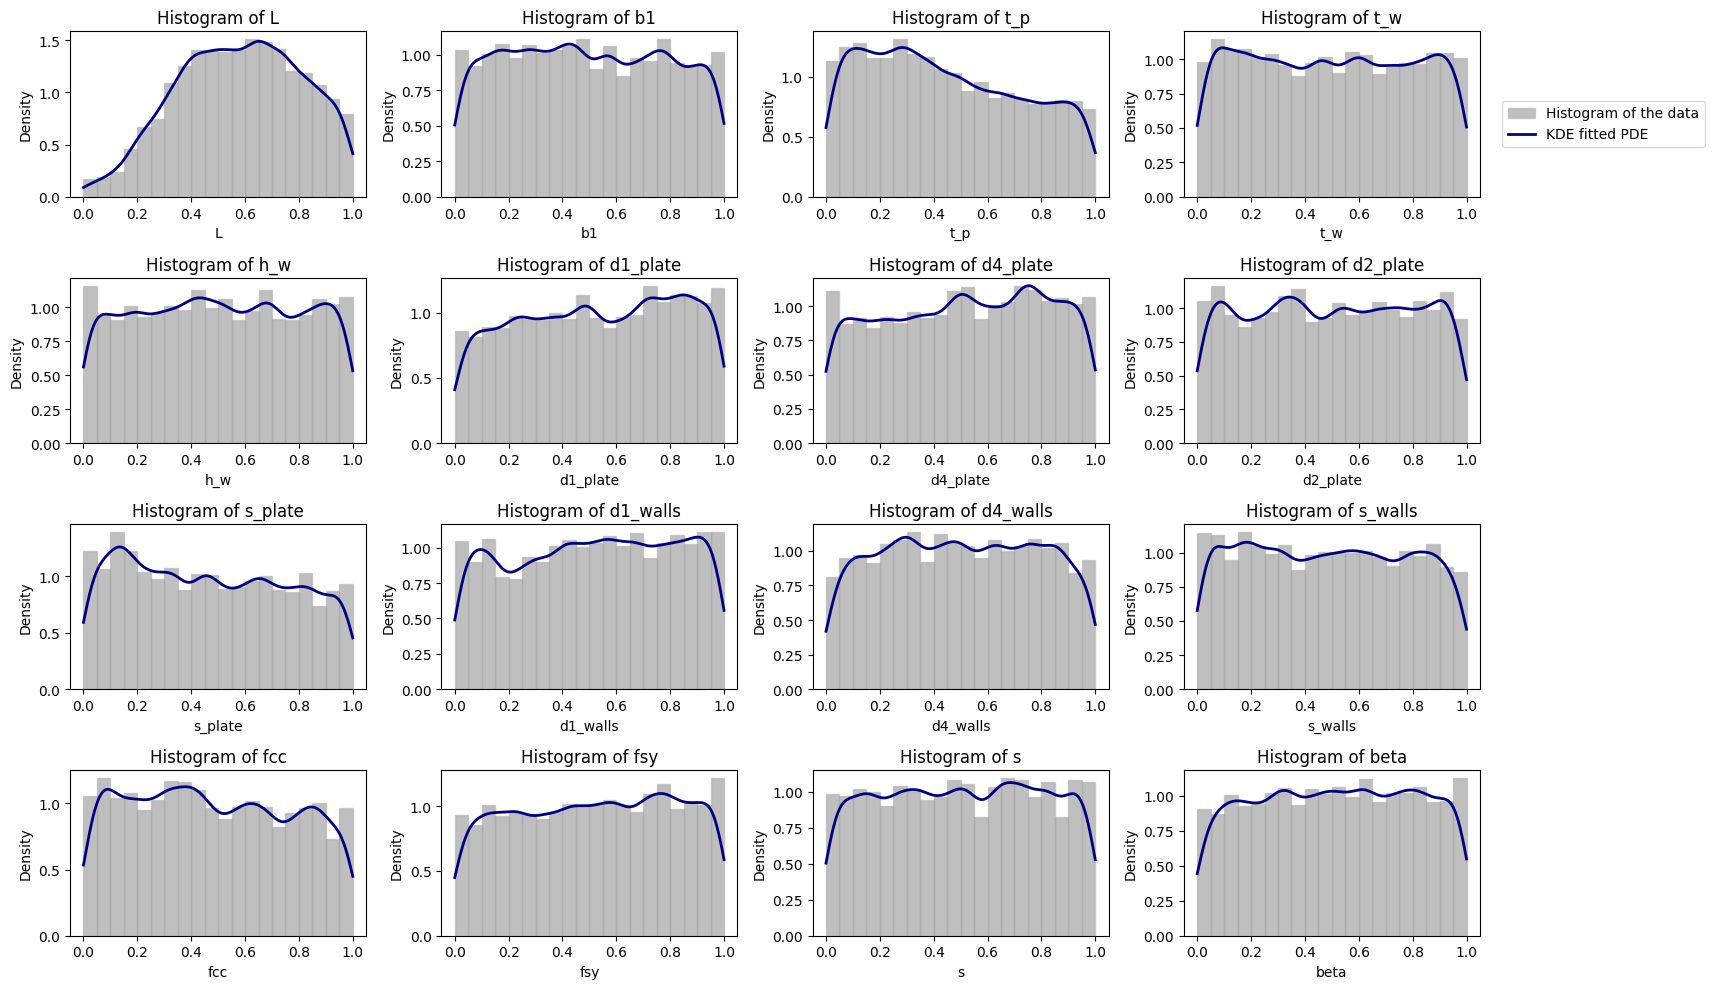

: 

In [10]:
hist_kde_matrix(fitting_data_scaled, bandwidth=0.04)

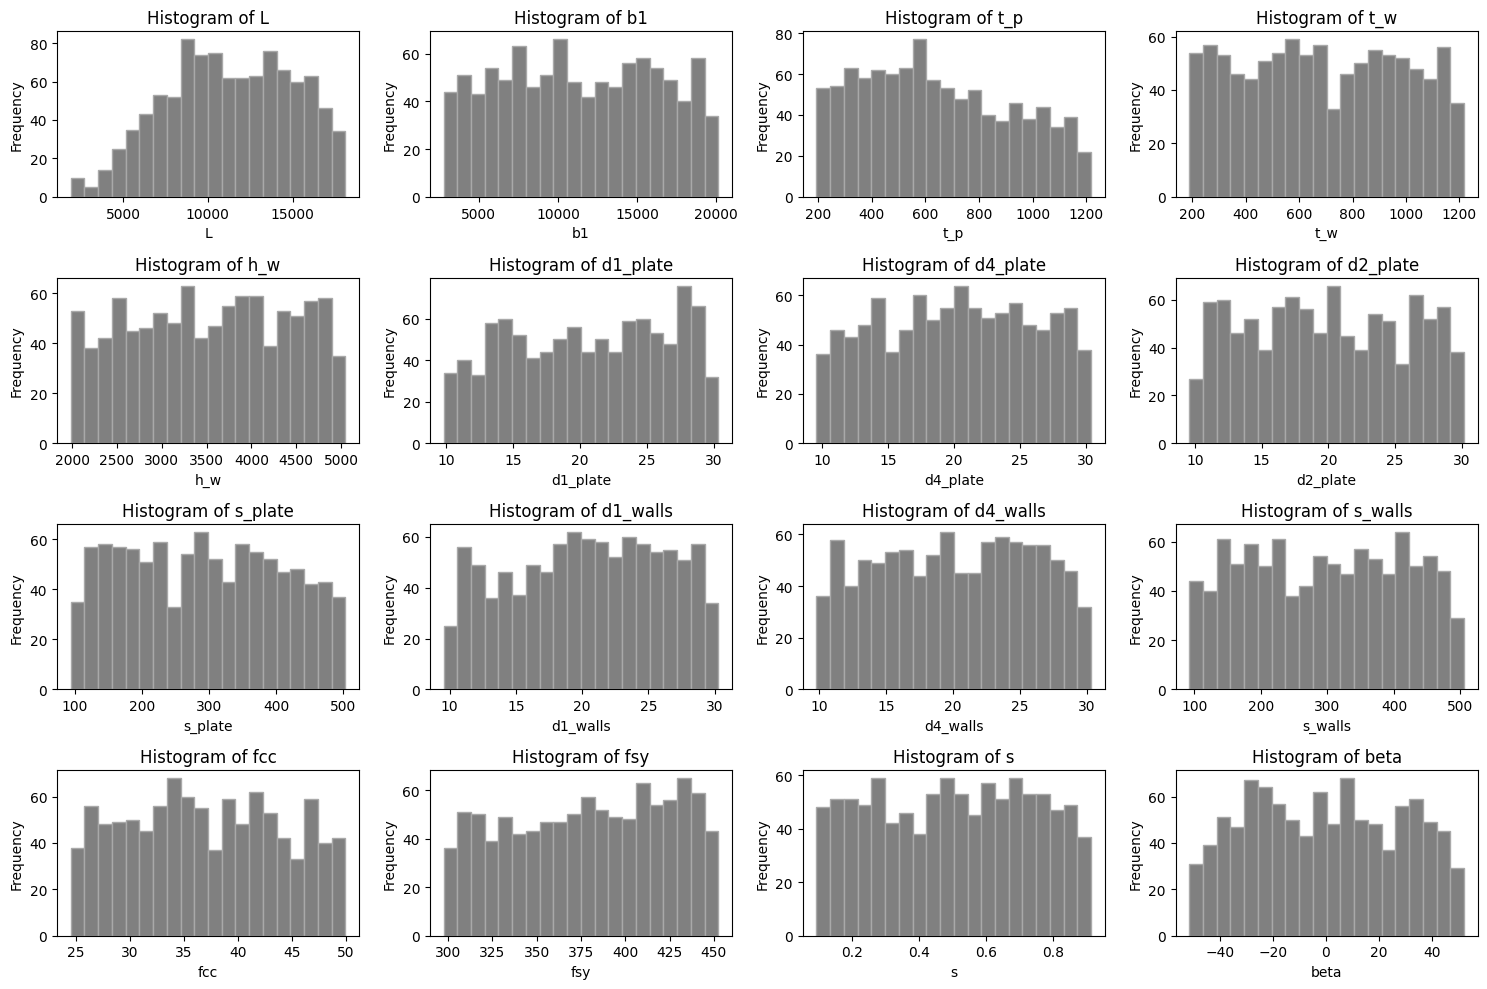

In [13]:
hist_matrix(df_kde_sampled)

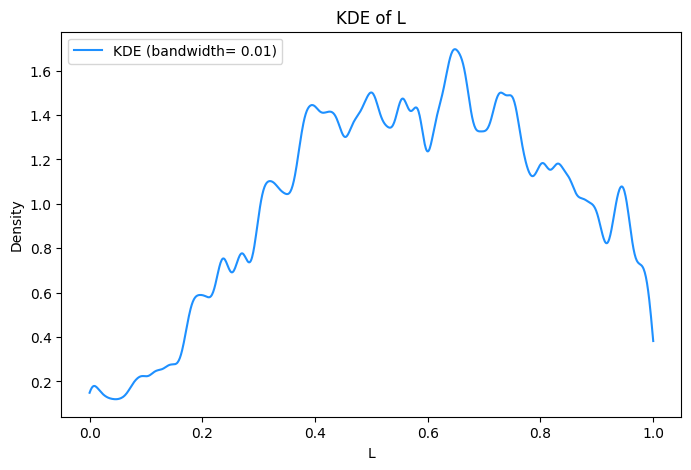

In [20]:
# Example for plotting the PDF of the first variable 'L'
variable = 'L'

# fitting_data['L']
# data = df_filtered[variable].values.reshape(-1, 1)
data=fitting_data_scaled[variable].values.reshape(-1, 1)

# # Fit KDE
bandwidth=0.01
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(data)

# Create a grid of values (covering the range of your data)
x_grid = np.linspace(data.min(), data.max(), 1000).reshape(-1, 1)

# Evaluate the PDF on the grid
log_pdf = kde.score_samples(x_grid)
pdf = np.exp(log_pdf)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x_grid, pdf,label='KDE (bandwidth= {})'.format(bandwidth), color='dodgerblue')
#plt.fill_between(x_grid, pdf, color='dodgerblue', alpha=0.5)
plt.title(f'KDE of {variable}')
plt.xlabel(variable)
plt.ylabel('Density')
plt.legend()
plt.show()

In [61]:
bridge_parameters = {
    #-----Main Geometric Parameters------
    # Plate Angle [Degree]
    'alpha_l':[90],
    # Hight of Voute  [mm]
    'h_v': [0] ,
     # Length of Voute  [mm]
    'l_v': [0],    


    #-----Reinforcement Geom. Parameters-----
    # upper reinforcement cover [mm],
    'oo' : [30],
    # lower reinforcement cover [mm]
    'uu': [30],
    # Reinforcement Diameter of all plate sections - Layer 3 (upper middle layer) [mm]
    'd3_plate': [12],
    # Reinforcement Diameter of all walls sections - Layer 3 (outer middle layer) [mm]
    'd3_walls': [12],
    # Reinforcement Diameter of all walls sections - Layer 2 (inner middle layer) [mm]
    'd2_walls':[12],


    #-----Material Parameters -------
    # Reinforcement steel ultimate strength factor
    'fsu_fac': [1.08],
    # ultimate reinforcement strain [-]
    'esu': [0.045],

    #----- Load Parameter -------
    #Gravel layer hight [mm]
    'h_G': [1000],
    #spez. weight of backfill [N/mm3]
    'gamma_E':[0.00002],
    # friction angle [Degree]
    'phi_k': [30],
    # Load of concrete sleeper (Betonschwelle) and rail track [N/mm]
    'q_Gl': [4.8+1.7],
    # width of concrete sleeper (Betonschwelle) [mm]
    'b_Bs':[2500] ,
    # norminal axle load (dependent on the class, acc. to SIA 269/1 11.2, for D4 = 225 [N] )
    'Q_k':[225000],


    # -----section geom. parameter -----
    # Proportion of outter plate sections [-]
    'l_sec': [0.33 ],
    # Proportion of section 1 (wall 1 side) [-]
    'b_sec1_b1': [0.33],
    # Proportion of section 2 (wall 1 side) [-]
    'b_sec2_b1': [0.33],
    # Proportion of wall section (upper)
    'h_S1_3': [0.33],
    # Proportion of wall section (lower)
    'h_S7_9': [0.33],
    # mesh_size_factor (multiplied with t_p or t_w respectively)
    'mesh_size_factor': [3] 
    }

In [62]:
# combine sampled variable vector with constants
for key in bridge_parameters.keys():
    df_x[key]=bridge_parameters[key][0]
df_x

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,...,phi_k,q_Gl,b_Bs,Q_k,l_sec,b_sec1_b1,b_sec2_b1,h_S1_3,h_S7_9,mesh_size_factor
0,8232.955164,18517.137185,393.336755,711.600788,3103.434985,18.916264,25.813703,26.268633,444.647565,18.000636,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
1,5034.954098,6761.363486,592.365744,238.264254,3472.558855,20.855949,12.525010,28.453148,208.025978,25.092543,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
2,14287.036965,12122.176548,437.155881,1123.542718,3071.567807,29.620828,17.017605,23.139488,383.962240,26.256877,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
3,9627.539893,10094.277595,402.177691,952.188114,4547.126219,24.788987,29.664292,16.454493,373.015919,11.567340,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
4,7011.619909,14549.209287,949.205121,352.416577,2155.943263,12.330717,21.008335,20.956844,391.613336,28.610129,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9696.979215,10639.147467,892.756690,332.672249,3999.768362,29.457826,14.159496,18.687430,266.591562,22.183270,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
996,15425.140907,5744.938136,1043.320053,898.989160,3093.241530,20.668516,19.395612,23.808412,270.296982,11.361740,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
997,12005.995369,16348.653757,402.826292,1003.169158,3376.324208,28.633710,16.193536,12.615447,387.793588,27.445422,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3
998,10409.384942,18245.618434,633.548065,978.697655,4462.657677,11.636814,12.000197,23.010720,434.222555,18.200603,...,30,6.5,2500,225000,0.33,0.33,0.33,0.33,0.33,3


## Calculate dependent parameters

In [8]:
#----- sections geom. parameters------
df_x['b2']=df_x['b1'] # With of Wall 2 [mm]
df_x['b_sec1_b2'] = df_x['b_sec1_b1'] # Proportion of section 1 (wall 2 side) [-]
df_x['b_sec2_b2'] = df_x['b_sec1_b2'] # Proportion of section 2 (wall 2 side) [-]



# ------ material parameters--------
def ecu_calc(fccs): # EN 1992-1-1:2004 (Table 3.1)
    return fccs.apply(lambda fcc: -0.002 if fcc <= 50 else ((2.0+0.085*(fcc-50)**(0.53)) *-0.001))

df_x['ecu']=ecu_calc(df_x['fcc']) 

# Reinforcement
df_x['fsu']=df_x['fsu_fac']*df_x['fsy']


df_x[['fcc','ecu','fsy','fsu']]


,fcc,ecu,fsy,fsu
0,12.8,-0.002,390,421.2
1,12.8,-0.002,390,421.2
2,12.8,-0.002,390,421.2
3,12.8,-0.002,390,421.2
4,12.8,-0.002,390,421.2
5,12.8,-0.002,390,421.2
6,12.8,-0.002,390,421.2
7,12.8,-0.002,390,421.2
8,12.8,-0.002,390,421.2
9,12.8,-0.002,390,421.2


## Save Samples to CSV

In [9]:
# save vectors in one csv file
p_file=folder_path+ '\\{}_Batch\\{}_CFBSamples.csv'.format(idx_s,idx_s)
df_x.to_csv(p_file,index=True) # Save csv file

In [10]:
for i in range(len(df_x)):
    file_path=folder_path+ '\\{}_Batch\\{}_{}_CFB\\x.csv'.format(idx_s,idx_s,i)
    df_x.iloc[i].to_csv(file_path)

## Plot Distributions

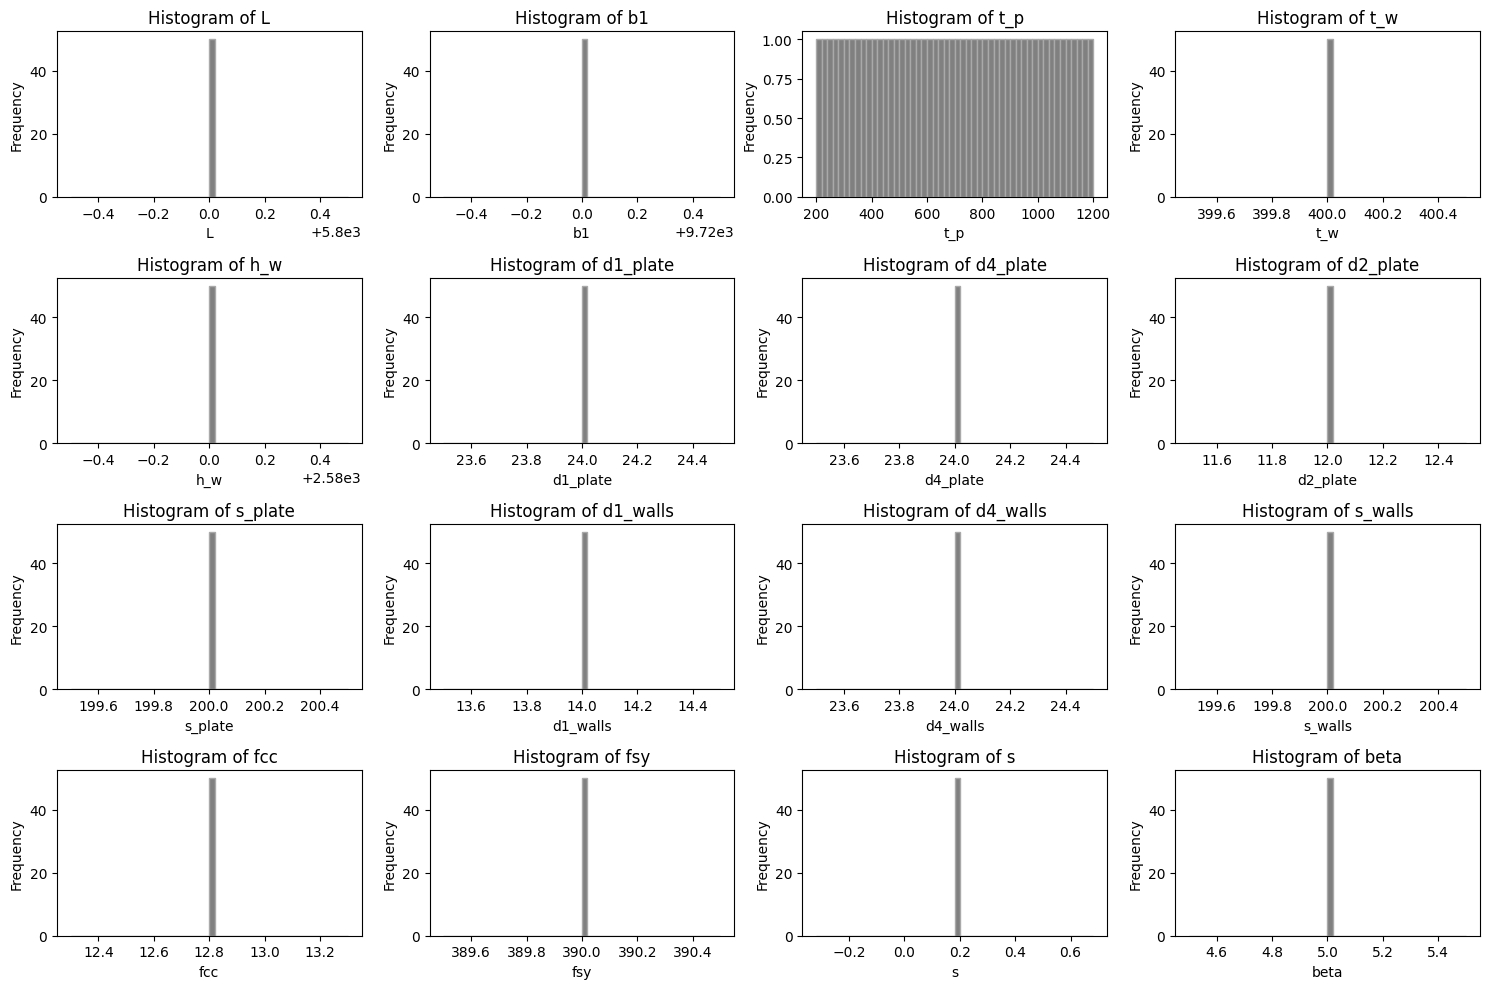

In [12]:
data=df_x #df_kde_sampled
cols=['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 'fsy', 's', 'beta']
hist_matrix(data[cols], bins=50)

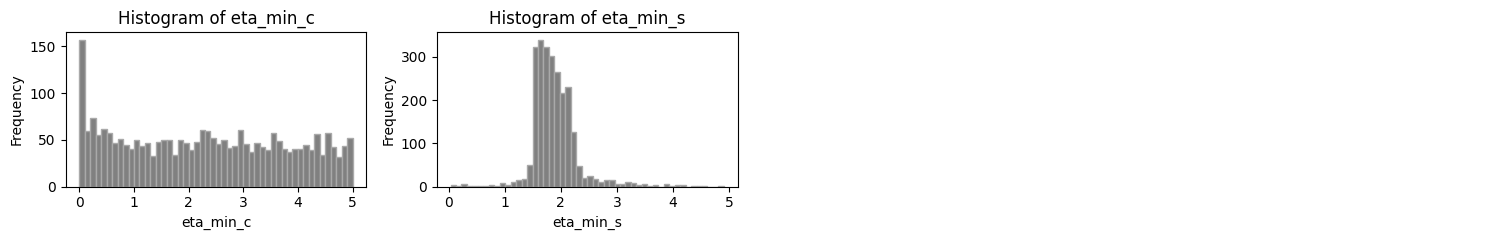

In [39]:
cols=['eta_min_c', 'eta_min_s']
hist_matrix(df_filtered[cols], bins=50)

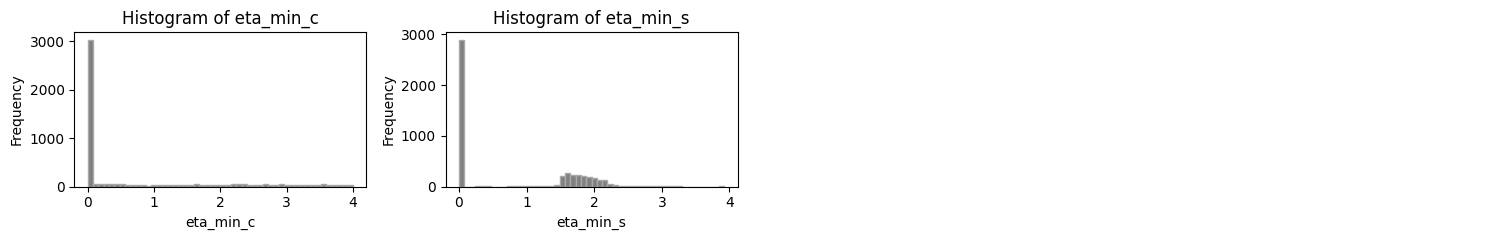

In [30]:
lower_bound=0
upper_bound=4

mask=(df['eta_min_c']>=lower_bound) & (df['eta_min_c']<=upper_bound) & (df['eta_min_s']>=lower_bound) & (df['eta_min_s']<=upper_bound)
cols=['eta_min_c', 'eta_min_s']
hist_matrix(df[cols][mask], bins=50)

# Further Code That Sophia needs to clean up:

In [7]:
samplingspace=CFBSamplingSpace()


In [8]:
samplingspace.ranges

{'L': (2000.0, 18000.0),
 'b1': (3000.0, 20000.0),
 't_p': (200.0, 1200.0),
 't_w': (200.0, 1200.0),
 'h_w': (2000.0, 5000.0)}

In [10]:
# define file path
#folder= 'C:\\Temp\\00_Sampled'


# define ranges of design parameter
#----- geometric parameter (global) --------
# Main geometry
L =  (2000.,18000.)     # Span [mm]
b1 = (3000.,20000.)     # With of Wall 1 [mm]
t_p = (200.,1200.)      # Plate Thickness [mm]

t_w = (200., 1200.)    # Wall Thickness [mm]
h_w = (2000.,5000.)    # Wall Hight [mm]


main_names = ['L','b1','t_p','t_w','h_w']
main=[L,b1,t_p,t_w,h_w]


#----- geometric parameter per section ---------
# Reinforcement diamater and spacing

#plate
d1_plate= (10,12,14,16,18,20,22,26,30) # Reinforcement Diameter of all plate sections - Layer 1 (lowest layer) [mm]
d1_plate=(10.,30.)
# (10,12,14,16,18,20,22,26,30) (10.,30.)
d4_plate= (10,12,14,16,18,20,22,26,30) # Reinforcement Diameter of all plate sections - Layer 4 (top layer) [mm]
d4_plate=(10.,30.)
# (10,12,14,16,18,20,22,26,30) (10.,30.)
d2_plate= (10,12,14,16,18,20,22,26,30) # Reinforcement Diameter of all plate sections - Layer 2 (lower inner layer) [mm]
d2_plate=(10.,30.)


s_plate= (75,100,150,200,250) # Reinforcement Spacing of plate  - all Layers [mm]
s_plate=(100.,500.)
#(75,100,150,200,250)(75,250)

#walls
d1_walls= (10,12,14,16,18,20,22,26,30) # Reinforcement Diameter of all wall sections - Layer 1 (inner layer) [mm]
d1_walls=(10.,30.)
# (10,12,14,16,18,20,22,26,30)
d4_walls= (10,12,14,16,18,20,22,26,30) # Reinforcement Diameter of all wall sections - Layer 4 (outer layer) [mm]
d4_walls=(10.,30.)
# (10,12,14,16,18,20,22,26,30)
s_walls= (75,100,150,200,250) # Reinforcement Spacing of walls  - all Layers [mm]
s_walls=(100.,500.)
#(75,100,150,200,250)


reinf=[d1_plate, d4_plate, d2_plate, s_plate, d1_walls, d4_walls, s_walls]
reinf_names = ['d1_plate','d4_plate', 'd2_plate', 's_plate','d1_walls','d4_walls','s_walls']



#----- material parameter--------

# concrete parameter (at first constant for whole structure)
# sampling of fcd --> fck berechnen und dann ecu
fcc = (25.,50.) # fck [MPa] taken from EN 1992-1-1:2004 (Table 3.1) (charakteristischer Wert der Zylinderdruckfestigkeit)
# (40,45,50,55, 60,70,80,90) chosen continous as for exiting structured there could be material tests

# ecu is calculated based on fcc (after sampling, see below)

# steel
fsy = (300., 450.) # MPa / N/mm2 Fliessgrenze von Betonstahl (chosen continous as for exiting structured there could be material tests)
#fsu_fac = (1.0, 2.0) # larger than fsy, but continously larger (--> daher sample ich mit einem Faktor)
# fsu = (850., 850.001) # Duktilitätsgrenze

          
          
matPar = [fcc, fsy]
matPar_names = ['fcc', 'fsy']


# ----- loading parameter -----------
s = (0.1, 0.9) # Distance factor of railway track
beta = (-50., 50.) # angle of railway track


loadPar = [s, beta]
loadPar_names = ['s', 'beta']


In [11]:
# idea make a sample space library (dict) 
#sodass man diesen nicht immer neu definieren muss (da es so viele Parameter sind ist das extrem nerfig)
# und es sollte leich sein andere sampling methoden (gleiche b1 =b2 oder einheitliche bewehrung zu samplen, oder gerade sections)
# bei schrägen brücken auch oft gerade sections unterteilungen. zurzeit nicht so einfach möglich so zu samplem
# aber mann kann tioretisch berechnen wie gross dann die anderen parameter sein müssen abhängig von b1 und b2 
# oder man kann die prior brücken parameter nehmen und aus der verteilung samplen...

# lieber mach ich pakete die man zusammenaddieren kann?

In [12]:
# define deisgn feature space
space =  main + reinf +matPar + loadPar
space_names = main_names  + reinf_names +matPar_names + loadPar_names

# space = [t_p]
# space_names = ['t_p',]

print(space)
print(space_names)
print(len(space_names))

[(2000.0, 18000.0), (3000.0, 20000.0), (200.0, 1200.0), (200.0, 1200.0), (2000.0, 5000.0), (10.0, 30.0), (10.0, 30.0), (10.0, 30.0), (100.0, 500.0), (10.0, 30.0), (10.0, 30.0), (100.0, 500.0), (25.0, 50.0), (300.0, 450.0), (0.1, 0.9), (-50.0, 50.0)]
['L', 'b1', 't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 'fsy', 's', 'beta']
16


In [13]:
sampler=Sobol()
sampler.generate(space, n_samples,random_state=None)


c:\Users\kuhnso\AppData\Local\anaconda3\envs\strucenglib3\lib\site-packages\skopt\sampler\sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+5=5. 
  warnings.warn("The balance properties of Sobol' points require "


[[12704.680197667205,
  5222.723294329015,
  1173.7998830694855,
  654.0572632971773,
  3102.8550225482813,
  19.11660130422578,
  16.765255087347587,
  17.615142659063125,
  326.98989008992316,
  14.965627602867372,
  12.390995256090969,
  229.3555386901062,
  32.937221158557364,
  390.8599065976664,
  0.8277423461890362,
  -43.23869024758278],
 [4704.680197667205,
  13722.723294329015,
  673.7998830694856,
  1154.0572632971773,
  4602.855022548281,
  29.11660130422578,
  26.765255087347587,
  27.615142659063125,
  126.98989008992321,
  24.96562760286737,
  22.390995256090967,
  429.3555386901062,
  45.437221158557364,
  315.8599065976664,
  0.42774234618903617,
  6.761309752417219],
 [8704.680197667205,
  9472.723294329015,
  923.7998830694856,
  904.0572632971773,
  2352.8550225482813,
  24.11660130422578,
  11.765255087347587,
  22.615142659063125,
  426.98989008992316,
  29.96562760286737,
  17.390995256090967,
  129.3555386901062,
  39.187221158557364,
  353.3599065976664,
  0.22

In [14]:

# generate Samples - LHS
lhs=Lhs(lhs_type='classic', criterion='maximin', iterations=1000)
X=lhs.generate(space, n_samples, random_state=None)

# # generate Samples - Sobol --> Sample Space has to have less than 40 variables)
# sobol=Sobol()
# X=sobol.generate(space, n_samples, random_state=None)

# tranform into datafram
df_x=pd.DataFrame(X)
df_x.columns =  space_names # renaming columns

df_x.head(10)

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,fsy,s,beta
0,17337.374855,4338.777770,834.350691,1190.227430,2451.902281,16.232466,19.383556,27.301856,195.549632,20.433397,28.910171,171.253858,39.660164,339.373603,0.476486,-11.993077
1,7293.371776,18763.192238,1187.545280,588.613112,4795.068488,19.284840,28.730263,25.118926,115.910755,10.805883,19.150294,225.202209,25.910016,409.054550,0.293975,-7.626988
2,3888.793162,8525.657866,354.521284,918.627293,3515.079516,12.321687,16.055556,12.092133,474.127859,15.293864,16.864863,434.589691,47.751375,389.744777,0.690736,19.321465
3,11047.456932,13013.230168,442.346427,621.032707,2969.536385,28.214802,24.333096,15.981278,280.115507,29.895390,11.095717,297.295777,31.127332,434.899730,0.243437,48.482016
4,12175.440417,15885.534665,778.971181,233.901415,4324.547048,22.796573,13.539986,18.929485,350.723270,25.908227,25.578081,382.071463,40.076503,312.339437,0.877849,-41.977229


In [15]:
df_x

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,fsy,s,beta
0,17337.374855,4338.777770,834.350691,1190.227430,2451.902281,16.232466,19.383556,27.301856,195.549632,20.433397,28.910171,171.253858,39.660164,339.373603,0.476486,-11.993077
1,7293.371776,18763.192238,1187.545280,588.613112,4795.068488,19.284840,28.730263,25.118926,115.910755,10.805883,19.150294,225.202209,25.910016,409.054550,0.293975,-7.626988
2,3888.793162,8525.657866,354.521284,918.627293,3515.079516,12.321687,16.055556,12.092133,474.127859,15.293864,16.864863,434.589691,47.751375,389.744777,0.690736,19.321465
3,11047.456932,13013.230168,442.346427,621.032707,2969.536385,28.214802,24.333096,15.981278,280.115507,29.895390,11.095717,297.295777,31.127332,434.899730,0.243437,48.482016
4,12175.440417,15885.534665,778.971181,233.901415,4324.547048,22.796573,13.539986,18.929485,350.723270,25.908227,25.578081,382.071463,40.076503,312.339437,0.877849,-41.977229


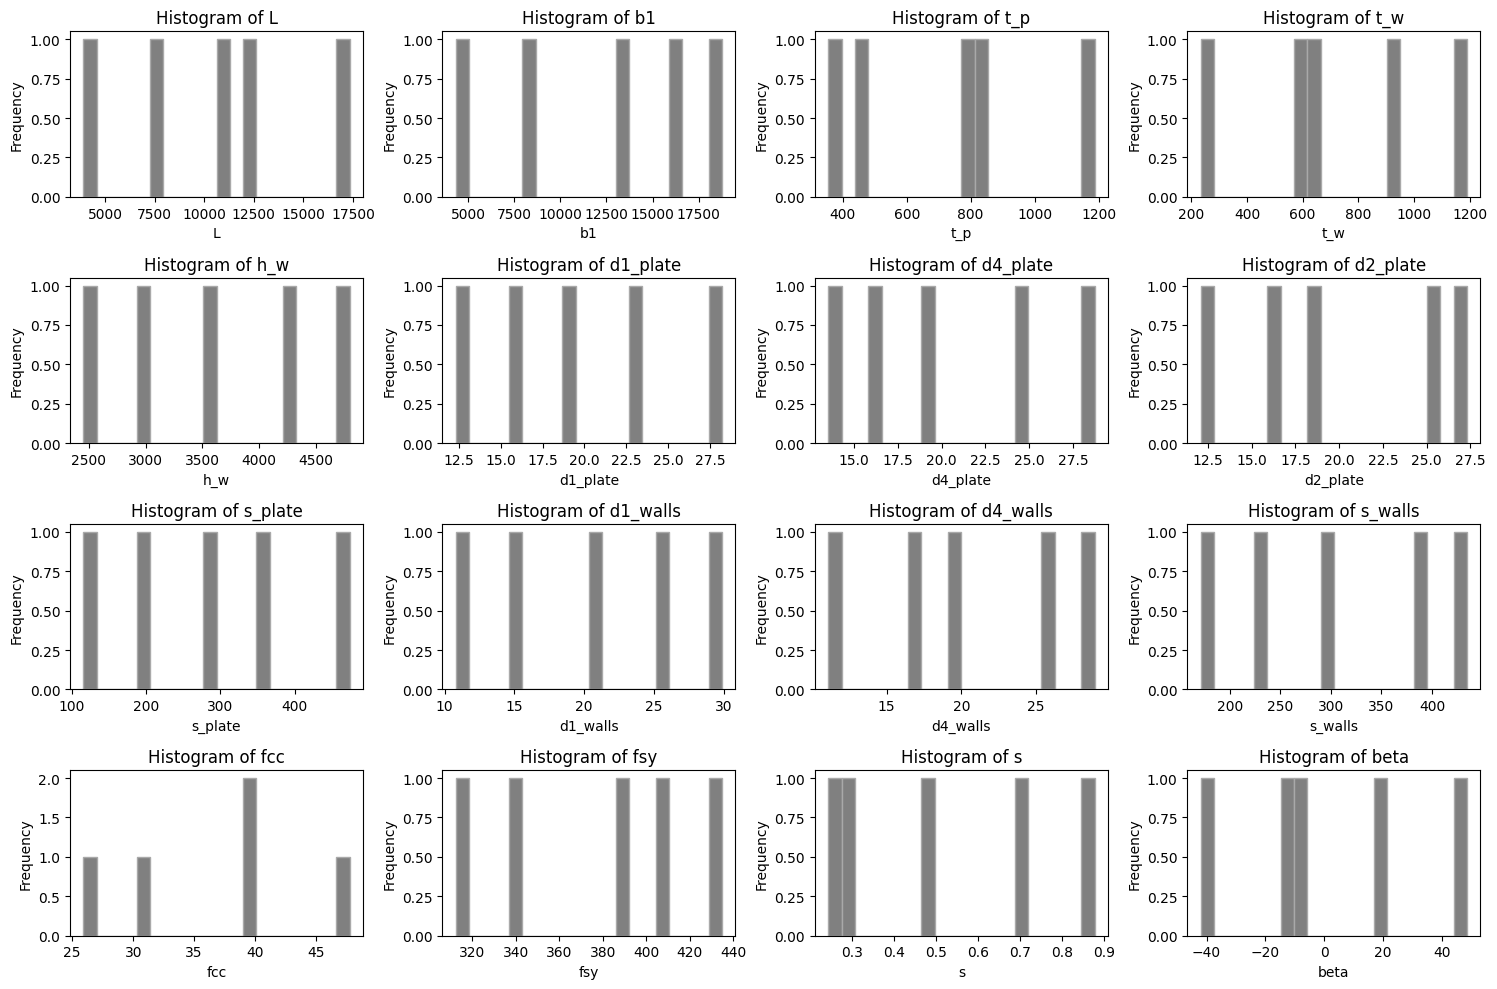

In [16]:
hist_matrix(df_x, n_cols=4, bins=20, color='gray', edgecolor='darkgray')

In [28]:
#!!! Run when 1D data generation
# Generate ordered samples
v=np.linspace(L[0], L[1], n_samples)
df_v=pd.DataFrame(v, columns=['L'])
df_v

,L
0,2000.000000
1,2016.016016
2,2032.032032
3,2048.048048
4,2064.064064
...,...
995,17935.935936
996,17951.951952
997,17967.967968
998,17983.983984


In [29]:
# define a specific sample to be caluclated
hero_parameters = {
    #-----Geometric Parameters------
    # Span [mm]
    'L': 5800,
    # Width [mm]
    'b1': 9720,
    # Deck slab (plate) thickness [mm]
    't_p': 400,
    # walls thickness [mm]
    't_w': 400,
    # wall height [mm]
    'h_w': 2580,
    # upper reinforcement cover [mm],
    'oo' : 30,
    # lower reinforcement cover [mm]
    'uu': 30,

    #-----Reinforcement Geom. Parameters-----
    # Reinforcement Diameter of all plate sections - Layer 4 (upper outer layer) [mm]
    'd4_plate': 24,
    # Reinforcement Diameter of all plate sections - Layer 3 (upper middle layer) [mm]
    'd3_plate': 12,
    # Reinforcement Diameter of all plate sections - Layer 2 (lower middle layer) [mm]
    'd2_plate':12,
    # Reinforcement Diameter of all plate sections - Layer 1 (lower outer layer) [mm]
    'd1_plate': 24,
    # Reinforcement spacing of all plate sections [mm]
    's_plate': 200,
    # Reinforcement Diameter of all walls sections - Layer 4 (outer layer) [mm]
    'd4_walls': 24,
    # Reinforcement Diameter of all walls sections - Layer 3 (outer middle layer) [mm]
    'd3_plate': 12,
    # Reinforcement Diameter of all walls sections - Layer 2 (inner middle layer) [mm]
    'd2_plate':12,
    # Reinforcement Diameter of all plate sections - Layer 1 (inner layer) [mm]
    'd1_walls': 14,
    # Reinforcement spacing of all walls sections [mm]
    's_walls': 200,

    #-----Material Parameters -------
    # Concrete compressive strength
    'fcc': 12.8,
    # Reinforcement steel yield strength
    'fsy': 390,
    # Reinforcement steel ultimate strength factor
    'fsu_fac': 1.08,
    # ultimate reinforcement strain [-]
    'esu': 0.045,

    #----- Load Parameter -------
    # Distance between origin and track middle axis
    's': 0.18179012,
    # Angle between global x axis and track axis
    'beta': 5,
    #Gravel layer hight [mm]
    'h_G': 1000,
    #spez. weight of backfill [N/mm3]
    'gamma_E':0.00002,
    # friction angle [Degree]
    'phi_k': 30,
    # Load of concrete sleeper (Betonschwelle) and rail track [N/mm]
    'q_Gl': 4.8+1.7,
    # width of concrete sleeper (Betonschwelle) [mm]
    'b_Bs':2500 ,
    # norminal axle load (dependent on the class, acc. to SIA 269/1 11.2, for D4 = 225 [N] )
    'Q_k':225000,
    
    }


#----- geometric parameter (global) --------
# Main geometry
df_x['b2']=df_x['b1'] # With of Wall 2 [mm]
df_x['alpha_l']=90  # Plate Angle [Degree]

#plate parameter
df_x['l_sec'] = 0.33    # Proportion of outter plate sections [-]
# (0.1,0.45)

df_x['b_sec1_b1'] = 0.33 # Proportion of section 1 (wall 1 side) [-]
df_x['b_sec2_b1'] = 0.33 # Proportion of section 2 (wall 1 side) [-]
df_x['b_sec1_b2'] = df_x['b_sec1_b1'] # Proportion of section 1 (wall 2 side) [-]
df_x['b_sec2_b2'] = df_x['b_sec1_b2'] # Proportion of section 2 (wall 2 side) [-]
#(0.05,0.45)

# wall paraeter
df_x['h_S1_3'] = 0.33   # Proportion of wall section (upper)
df_x['h_S7_9'] = 0.33   # Proportion of wall section (lower)
#(0.05,0.45)

# vouten and parapet geometry parameter
df_x['h_v'] = 0       # Hight of Voute  [mm]
df_x['l_v'] = 0     # Length of Voute  [mm]




In [ ]:
hero_parameters = {
    'L': 5800,
    'b1': 9720,
    't_p': 400,
    't_w': 400,
    'h_w': 2580,
    'd1_plate': 24,
    'd4_plate': 24,
    'd2_plate':12,
    's_plate': 200,
    'd1_walls': 14,
    'd4_walls': 24,
    's_walls': 200,
    'fcc': 12.8,
    'fsy': 390,
    'fsu_fac': 1.08,
    's': 0.18179012,
    'beta': 5
}

In [30]:
#!!!! Only run if 1D parameter study
# create multiple samples with only one variable varied
df_v
for key in hero_parameters.keys():
    df_v[key]=hero_parameters[key]
df_x=df_v
df_x

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,fsy,fsu_fac,s,beta
0,5800,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,1.08,0.18179,5
1,5800,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,1.08,0.18179,5
2,5800,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,1.08,0.18179,5
3,5800,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,1.08,0.18179,5
4,5800,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,1.08,0.18179,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5800,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,1.08,0.18179,5
996,5800,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,1.08,0.18179,5
997,5800,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,1.08,0.18179,5
998,5800,9720,400,400,2580,24,24,12,200,14,24,200,12.8,390,1.08,0.18179,5


In [31]:
# Make it easyer to do these 3 options: Sampler with lhc/ sobol with alot of paramters, line space sampling for one parameter, Define all variables for a sample

# TODO: idea to make sampling cleaner: write a function that does the sampling, the defining of constants in the background,
# define a dict with all possible parameters and their ranges
# default sample everything (maybe ability presetting Step 1.1. etc)
# can provide reduced list of parameters
# can also provide a dict with fixed parameters (which are then excluded from samling)
# also a way to set some parameters equivalent to other parameters after sampling
# some are calculated after sampling
# should always return df in same column order (for that we however we need to fix the columns add I think I will add more for step 1.3)

In [12]:
# Materialkennwerte berechnen

# Concrete
# calculate dependent parameters
# fcc: Compressive strength of concrete
# ecu: Ultimate compressive strain in the concrete
def ecu_calc(fccs): # EN 1992-1-1:2004 (Table 3.1)
    return fccs.apply(lambda fcc: -0.002 if fcc <= 50 else ((2.0+0.085*(fcc-50)**(0.53)) *-0.001))

df_x['ecu']=ecu_calc(df_x['fcc']) 

# Reinforcement
df_x['fsu']=1.08*df_x['fsy']
#df_x['fsu']=df_x['fsu_fac']*df_x['fsy'] #calculate fsu with sampled fsu factor multiplied with fsy

#print
df_x[['fcc','ecu','fsy','fsu']]

,fcc,ecu,fsy,fsu
0,47.169869,-0.002,387.946358,418.982066
1,45.876451,-0.002,328.836253,355.143154
2,35.186516,-0.002,440.434750,475.669530
3,48.532747,-0.002,325.301544,351.325667
4,39.914339,-0.002,376.848799,406.996703
...,...,...,...,...
9995,32.198428,-0.002,336.374928,363.284922
9996,37.996793,-0.002,308.267650,332.929062
9997,39.635970,-0.002,391.241020,422.540302
9998,42.885958,-0.002,345.464836,373.102023


In [13]:
#define constant design variables for phase 1
# we still save all of these constant variables in the data set, to ensure: when we extend the model,
# we know these variables for each sample and combine the samples.

#----- geometric parameter (global) --------
# Main geometry
df_x['b2']=df_x['b1'] # With of Wall 2 [mm]
df_x['alpha_l']=90  # Plate Angle [Degree]

#plate parameter
df_x['l_sec'] = 0.33    # Proportion of outter plate sections [-]
# (0.1,0.45)

df_x['b_sec1_b1'] = 0.33 # Proportion of section 1 (wall 1 side) [-]
df_x['b_sec2_b1'] = 0.33 # Proportion of section 2 (wall 1 side) [-]
df_x['b_sec1_b2'] = df_x['b_sec1_b1'] # Proportion of section 1 (wall 2 side) [-]
df_x['b_sec2_b2'] = df_x['b_sec1_b2'] # Proportion of section 2 (wall 2 side) [-]
#(0.05,0.45)

# wall paraeter
df_x['h_S1_3'] = 0.33   # Proportion of wall section (upper)
df_x['h_S7_9'] = 0.33   # Proportion of wall section (lower)
#(0.05,0.45)

# vouten and parapet geometry parameter
df_x['h_v'] = 0       # Hight of Voute  [mm]
df_x['l_v'] = 0     # Length of Voute  [mm]

df_x['left_p'] = False   #Parapet on the left (at x=0)
df_x['right_p'] = False  #Parapet on the right (at x=b1)
df_x['h_b'] = 0        #Parapet height (Bruestungshöhe) [mm]
df_x['b_b'] = 0      # Parapet width [mm]


# vouPar_names = ['h_v','l_v','left_p','right_p','h_b','b_b']
# vouPar = [h_v,l_v,left_p,right_p,h_b,b_b]



#----- material parameter--------

df_x['esu'] = 0.045 # ultimate reinforcement strain [-]


#----- load parameter--------
df_x['h_G'] = 1000 #Gravel layer hight [mm]
df_x['gamma_E'] =0.00002 #spez. weight of backfill [N/mm3]
df_x['phi_k'] = 30 # friction angle [Degree]

df_x['q_Gl'] = 4.8+1.7 # Load of concrete sleeper (Betonschwelle) and rail track [N/mm]
df_x['b_Bs']= 2500 # width of concrete sleeper (Betonschwelle) [mm]
df_x['Q_k'] = 225000 # norminal axle load (dependent on the class, acc. to SIA 269/1 11.2, for D4 = 225 [N] )


# ---- structural modeling parameters -------
# df_x['withMPCs'] = True     # with or without MPCs
# df_x['offsetmodeling'] = True  #with or without offsetmodeling
df_x['mesh_size_factor'] = 3  # mesh_size_factor (multiplied with t_p or t_w respectively)

In [15]:
#----- reinforcement --------
# define constant variables

df_x['oo'] = 30 # upper reinforcement cover [mm]
df_x['uu'] = 30 # lower reinforcement cover [mm]


#reinf=[d1_plate, d4_plate, s_plate, d1_walls, d4_walls, s_walls]

#plate
#df_x['d2_plate'] = 12 # Reinforcement Diameter of all plate sections - Layer 2 (lower middle layer) [mm]
df_x['d3_plate'] = 12 # Reinforcement Diameter of all plate sections - Layer 3 (upper middle layer) [mm]
# walls
df_x['d2_walls'] = 12 # Reinforcement Diameter of all wall sections - Layer 2 (inner middle layer) [mm]
df_x['d3_walls'] = 12 # Reinforcement Diameter of all wall sections - Layer 3 (outer middle layer) [mm]






C:\Users\kuhnso\AppData\Roaming\Python\Python39\site-packages\matplotlib\axes\_axes.py:6639: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


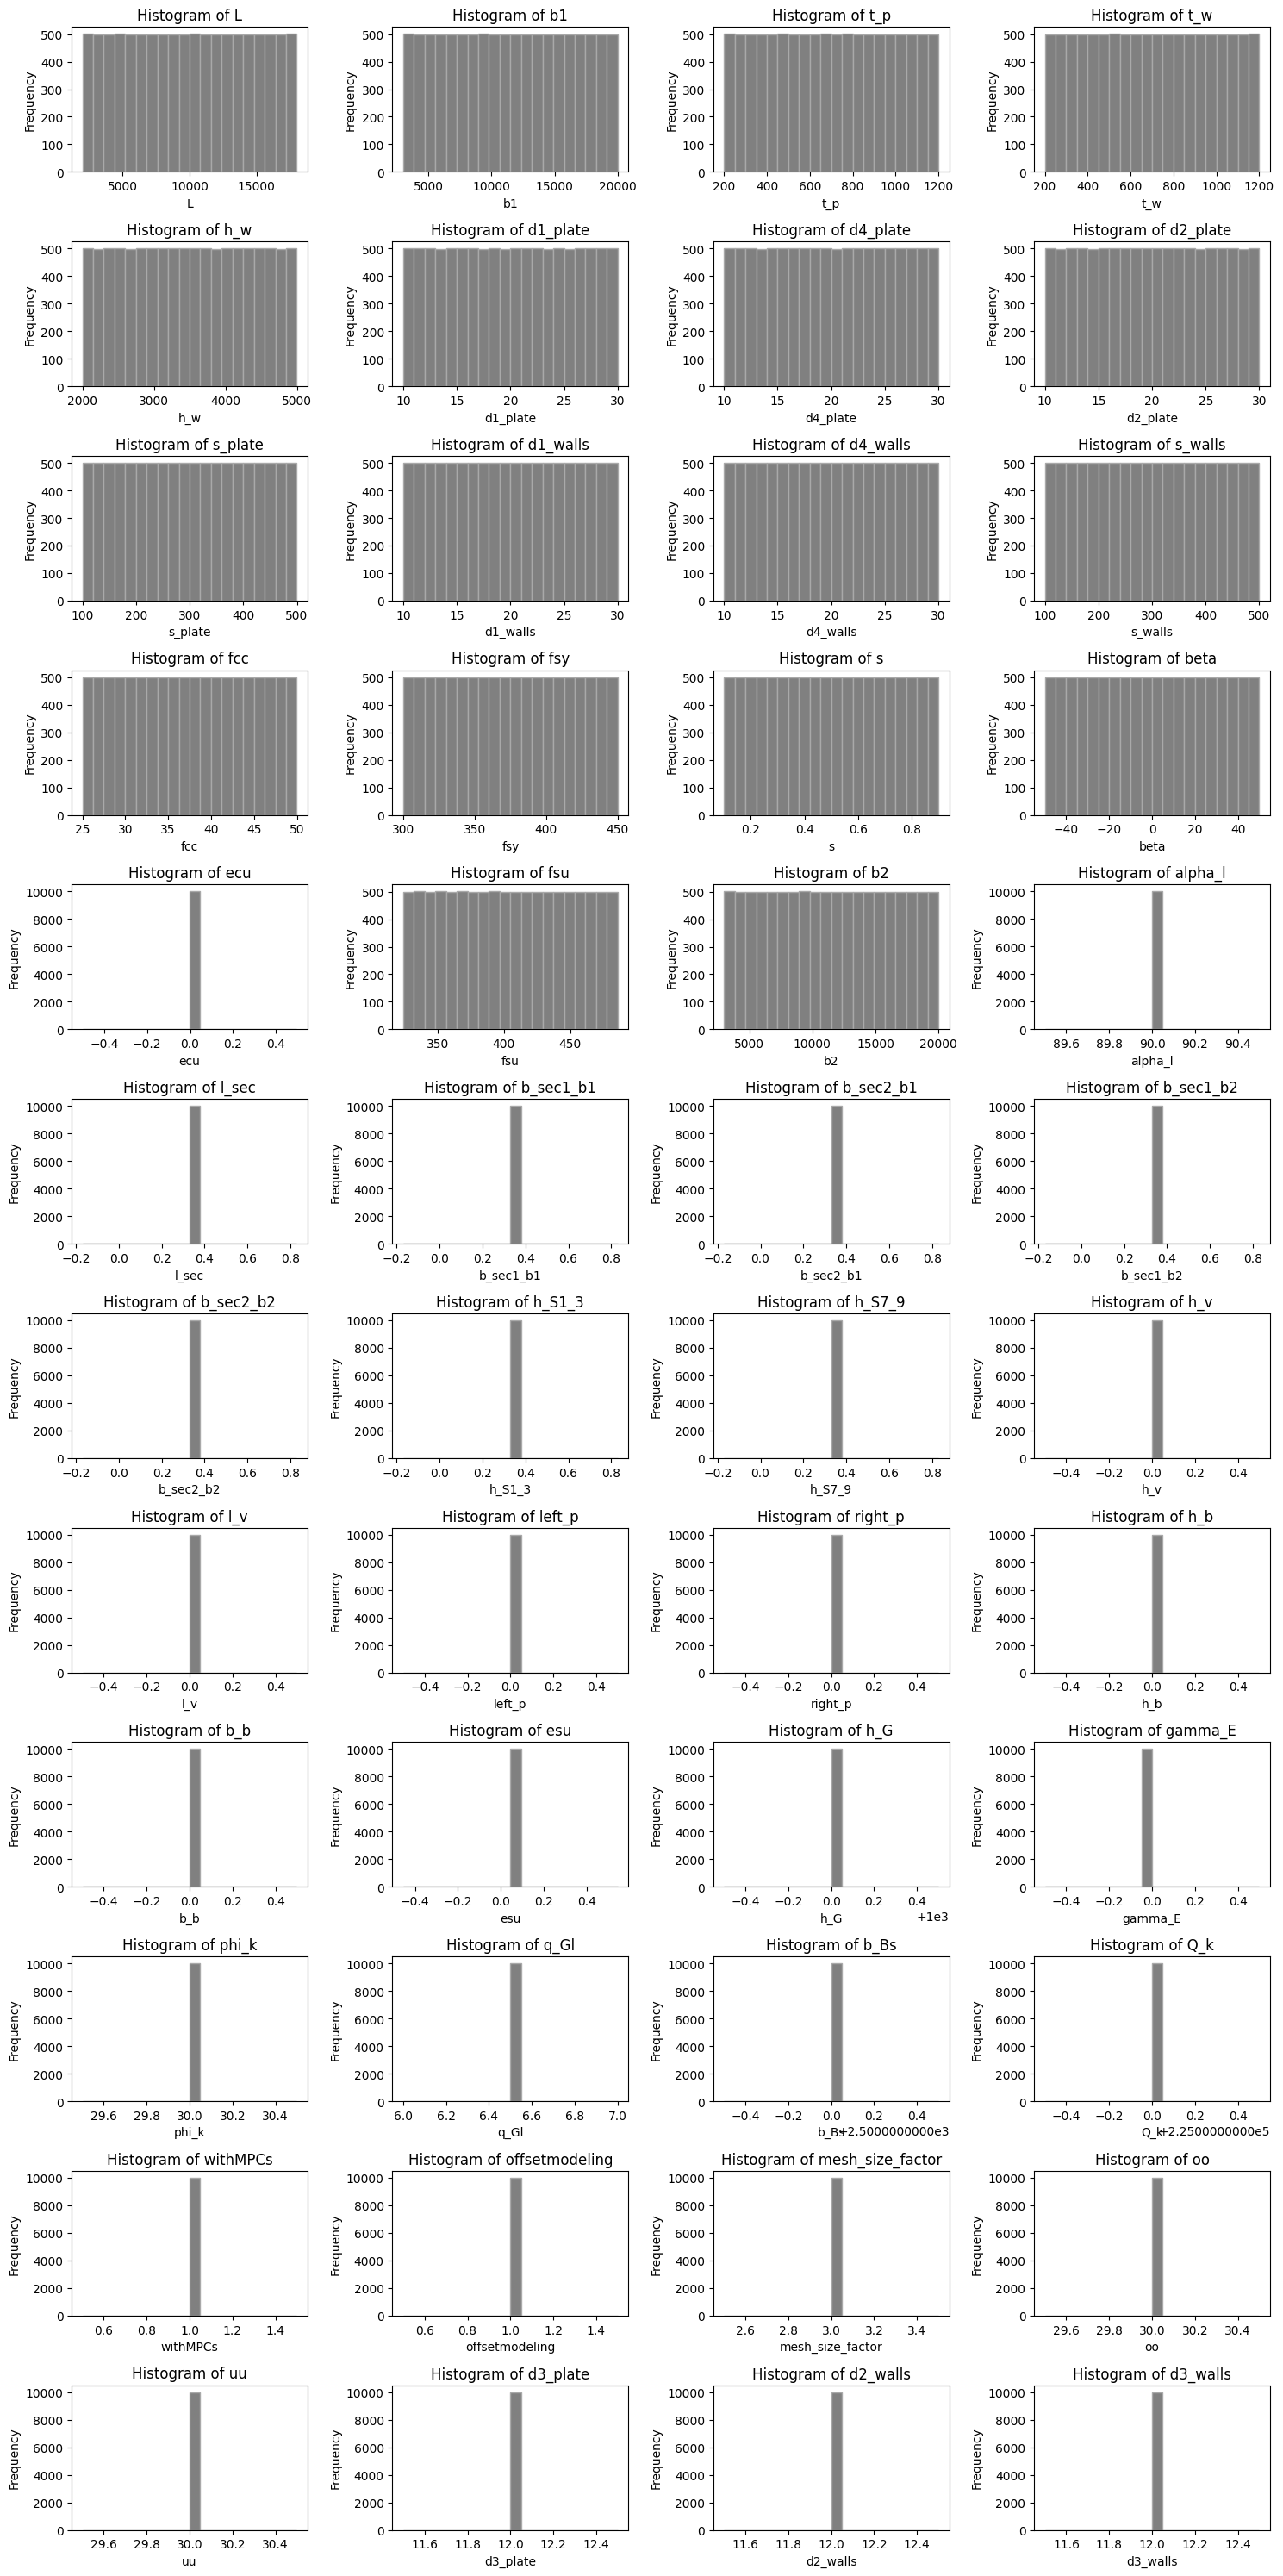

In [16]:
hist_matrix(df_x, n_cols=4, bins=20, color='gray', edgecolor='darkgray')

In [117]:
# # assign the reinforcements for each individual section
# for i in range (1,9+1):
#     print('i',i)
#     # plate
#     df_x['d1_plate_s{}'.format(i)]=df_x['d1_plate']
#     df_x['d2_plate_s{}'.format(i)]=df_x['d2_plate']
#     df_x['d3_plate_s{}'.format(i)]=df_x['d3_plate']
#     df_x['d4_plate_s{}'.format(i)]=df_x['d4_plate']
    
#     df_x['s1_plate_s{}'.format(i)]=df_x['s_plate']
#     df_x['s2_plate_s{}'.format(i)]=df_x['s_plate']
#     df_x['s3_plate_s{}'.format(i)]=df_x['s_plate']
#     df_x['s4_plate_s{}'.format(i)]=df_x['s_plate']
    
#     #walls
#     df_x['d1_walls_s{}'.format(i)]=df_x['d1_walls']
#     df_x['d2_walls_s{}'.format(i)]=df_x['d2_walls']
#     df_x['d3_walls_s{}'.format(i)]=df_x['d3_walls']
#     df_x['d4_walls_s{}'.format(i)]=df_x['d4_walls']
    
#     df_x['s1_walls_s{}'.format(i)]=df_x['s_walls']
#     df_x['s2_walls_s{}'.format(i)]=df_x['s_walls']
#     df_x['s3_walls_s{}'.format(i)]=df_x['s_walls']
#     df_x['s4_walls_s{}'.format(i)]=df_x['s_walls']

In [118]:
# # constante bewehrung definieren

# # set all reinforcements in plate and walls equal to first section reinforcement
# # so no 9 different reinforcements but only one reinforcement defined for plate, wall1, wall2
# for i in range(2,9+1): # i goes from 2 to 9
#     str_o='d_p_{}_o'.format(i)
#     df_x[str_o]= df_x['d_p_1_o']
#     str_i='d_p_{}_i'.format(i)
#     df_x[str_i]= df_x['d_p_1_i']
    
#     str_o='s_p_{}_o'.format(i)
#     df_x[str_o]= df_x['s_p_1_o']
#     str_i='s_p_{}_i'.format(i)
#     df_x[str_i]= df_x['s_p_1_i']
    
    
#     str_o='d_w1_{}_o'.format(i)
#     df_x[str_o]= df_x['d_w1_1_o']
#     str_i='d_w1_{}_i'.format(i)
#     df_x[str_i]= df_x['d_w1_1_i']
    
#     str_o='s_w1_{}_o'.format(i)
#     df_x[str_o]= df_x['s_w1_1_o']
#     str_i='s_w1_{}_i'.format(i)
#     df_x[str_i]= df_x['s_w1_1_i']
    
    
#     str_o='d_w2_{}_o'.format(i)
#     df_x[str_o]= df_x['d_w2_1_o']
#     str_i='d_w2_{}_i'.format(i)
#     df_x[str_i]= df_x['d_w2_1_i']
    
#     str_o='s_w2_{}_o'.format(i)
#     df_x[str_o]= df_x['s_w2_1_o']
#     str_i='s_w2_{}_i'.format(i)
#     df_x[str_i]= df_x['s_w2_1_i']





In [119]:
## TODO sort the columns in corect order (Does it change for next parameter studie steps?)

# save as csv

In [17]:
# save vectors in one csv file
p_file=subfolder_path+'\{}_CFBSamples.csv'.format(idx_s)
df_x.to_csv(p_file,index=True) # Save csv file

In [18]:
# save x.txt in specific subfolder
# for i in 
for i in range(len(df_x)):
    file_path=subfolder_path + '\\{}_{}_CFB\\x.csv'.format(idx_s,i)
    df_x.iloc[i].to_csv(file_path)



In [19]:
df_x

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,...,b_Bs,Q_k,withMPCs,offsetmodeling,mesh_size_factor,oo,uu,d3_plate,d2_walls,d3_walls
0,5896.042103,10183.791863,1189.025419,587.175975,3951.288982,16.589760,24.595059,15.124578,435.692977,16.282807,...,2500,225000,True,True,3,30,30,12,12,12
1,9783.893188,15582.253981,434.089655,668.134731,4157.543342,10.005126,15.433241,11.179018,396.732613,27.101958,...,2500,225000,True,True,3,30,30,12,12,12
2,3518.491402,15074.031207,509.342737,453.005723,4833.272653,19.790377,21.281638,25.048946,129.196749,11.510783,...,2500,225000,True,True,3,30,30,12,12,12
3,8975.183339,9902.815547,562.704986,824.904330,2401.438242,29.192119,13.684717,22.211689,393.728886,14.522004,...,2500,225000,True,True,3,30,30,12,12,12
4,16489.511572,7005.396051,327.627067,969.488477,3949.666517,22.085964,26.958668,12.714832,372.780441,13.228675,...,2500,225000,True,True,3,30,30,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,12009.791520,6576.097044,244.837150,871.359088,4352.899496,17.941201,22.823880,10.383476,225.278949,27.367336,...,2500,225000,True,True,3,30,30,12,12,12
9996,11473.186264,19974.765798,580.262817,1097.306805,3054.404916,23.501959,24.825286,10.970317,332.240991,25.520214,...,2500,225000,True,True,3,30,30,12,12,12
9997,12348.741871,12955.096886,341.437874,1001.502650,4743.323288,25.924541,20.770351,20.757222,459.672965,21.103440,...,2500,225000,True,True,3,30,30,12,12,12
9998,2813.057115,15155.575996,728.721522,789.405448,2374.975151,23.676648,29.684194,13.563459,293.991875,29.587925,...,2500,225000,True,True,3,30,30,12,12,12


# View Samples
#space_names= main_names + vouPar_names + matPar_names + p_ds_names + w1_ds_names + w2_ds_names

In [51]:
df_x

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,s_plate,d1_walls,d4_walls,...,s3_plate_s9,s4_plate_s9,d1_walls_s9,d2_walls_s9,d3_walls_s9,d4_walls_s9,s1_walls_s9,s2_walls_s9,s3_walls_s9,s4_walls_s9
0,5800,9720,400,400,2580,24,24,200,14,24,...,200,200,14,12,12,24,200,200,200,200


In [52]:
df_x['s']

0    0.18179
Name: s, dtype: float64

In [43]:
df_x['b1']

0    17476
1    27686
2     7479
3    32745
Name: b1, dtype: int64

In [42]:
df_x['s']*df_x['b1']

0    15726.308500
1    18133.646218
2     2878.211460
3      563.525231
dtype: float64

In [45]:
df_x['beta']

0   -76
1    53
2    41
3   -12
Name: beta, dtype: int64

In [32]:
df_x.loc[:,main_names]

,L,b1,t_p,t_w,h_w
0,11739,17476,683,1100,3838
1,6660,27686,1118,360,3111
2,3813,7479,316,632,4798
3,15276,32745,894,762,2632


In [33]:
df_x.loc[:,vouPar_names]

NameError: name 'vouPar_names' is not defined

In [ ]:
df_x.loc[:,['ecu']+matPar_names]

In [ ]:
df_x.loc[:,p_ds_names]

In [34]:
df_x.loc[:,w1_ds_names]

NameError: name 'w1_ds_names' is not defined

In [35]:
df_x.loc[:,w2_ds_names]

NameError: name 'w2_ds_names' is not defined